# Data preprocessing
Mise en forme des données avant le traitement par l'algorithme

### Image de base 
On souhaite recadrer l'image pour avoir  uniquement la pièce

<img src="data/19_Droit.jpg" alt="Sample" style="border:solid 2px black; width : 300px;" >






In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 100

###Importation de l'image
imagePath = "data/19_Droit.jpg"
img = cv2.imread(imagePath,cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_originale = np.copy(img)


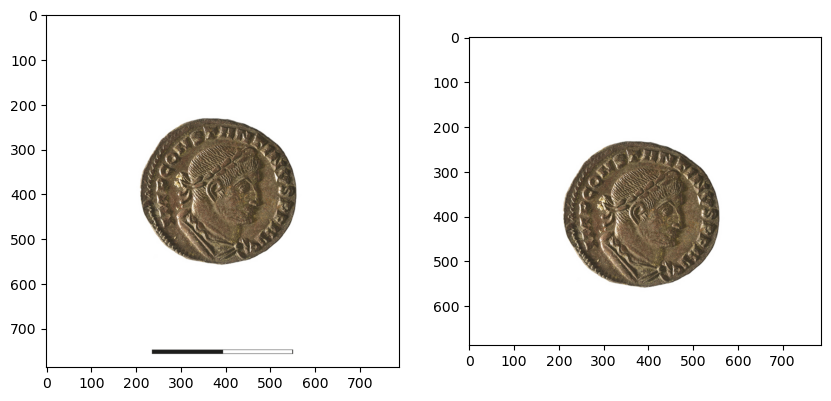

In [5]:
##### CROP le bas de l'image
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)

deltaL = 100
img = img[:-deltaL,:]
plt.imshow(img)
plt.show()

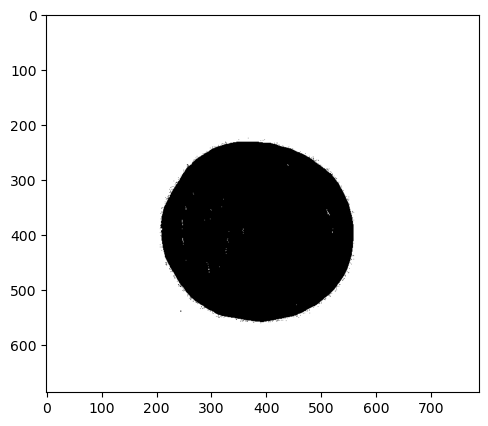

In [6]:
###Transformation binaire
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

ret,thresh1 = cv2.threshold(gray,253,255,cv2.THRESH_BINARY)

plt.imshow(thresh1,cmap = 'gray')
plt.show()

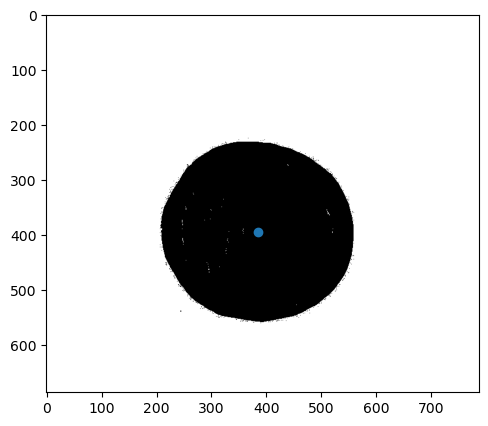

In [7]:
#Calcul du centre de masse
mass_x, mass_y = np.where(thresh1 <= 0)
cent_x = np.average(mass_x)
cent_y = np.average(mass_y)

plt.imshow(thresh1,cmap = 'gray')
plt.scatter(cent_y,cent_x)
plt.show()

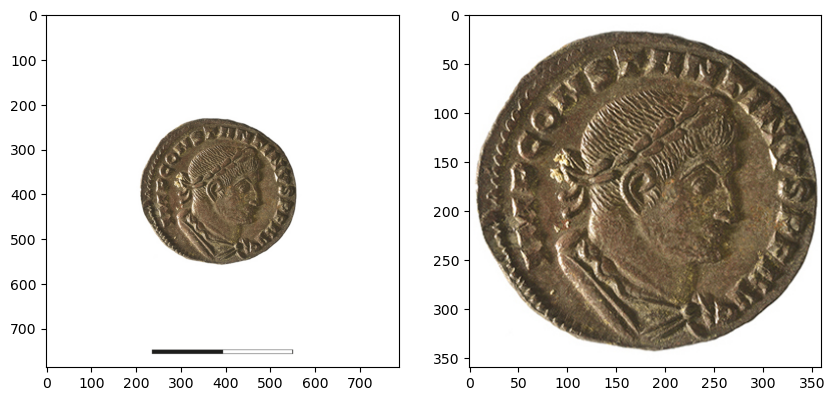

In [8]:
### Recadrage
SidePixel = 360

pixG = int(cent_x - SidePixel/2)
pixD = int(cent_x + SidePixel/2)
pixH = int(cent_y - SidePixel/2)
pixB = int(cent_y + SidePixel/2)


plt.subplot(1,2,1)
plt.imshow(img_originale)
plt.subplot(1,2,2)
plt.imshow(img[pixG:pixD,pixH:pixB])
plt.show()


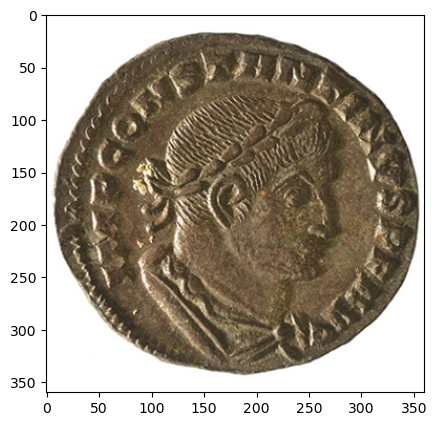

In [9]:
### Implémentation dans ImageProcessing
import ImageProcessing.processing as pr

plt.imshow(pr.cropToCoin(imagePath))
plt.show()

In [10]:
#Récuperer la liste des pièces
import os

listeCoin = []
basepath = 'data/'
for entry in os.listdir(basepath):
    if os.path.isfile(os.path.join(basepath, entry)):
        listeCoin.append(basepath + entry)
        
N = len(listeCoin)
        


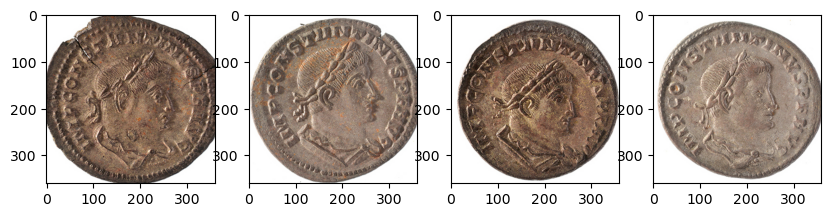

In [25]:
### Test sur plusieurs pièces
Idx = np.random.randint(0,N,size = 5)


for i in range(1,5):
    imagePath = listeCoin[np.random.randint(0,N+1)]
    plt.subplot(1,4,i)
    plt.imshow(pr.cropToCoin(imagePath))
    



## Amélioration possible :
- Utiliser uniquement les pixels qui ne sont pas blanc 
    
    créer une fonction qui convertit les vecteur utiles en image
